Loss at iteration 0: w=[ 0.5 -0.9], loss=99.66666666666666, gradiant=[ 50. 190.]
Loss at iteration 1: w=[0.99466667 0.90133333], loss=90.16000000000003, gradiant=[ -49.46666667 -180.13333333]
Loss at iteration 2: w=[ 0.54343111 -0.81649778], loss=81.56503703703709, gradiant=[ 45.12355556 171.78311111]
Loss at iteration 3: w=[0.99137967 0.81172504], loss=73.79428068103381, gradiant=[ -44.7948563  -162.82228148]
Loss at iteration 4: w=[ 0.58421367 -0.74141931], loss=66.76863217879882, gradiant=[ 40.71660057 155.31443421]
Loss at iteration 5: w=[0.98991448 0.73031318], loss=60.41658499066581, gradiant=[ -40.57008149 -147.17324833]
Loss at iteration 6: w=[ 0.62257404 -0.67394852], loss=54.673496038688434, gradiant=[ 36.73404411 140.42616996]
Loss at iteration 7: w=[0.99006862 0.65631842], loss=49.480926905726484, gradiant=[ -36.74945811 -133.02669416]
Loss at iteration 8: w=[ 0.65871738 -0.61334783], loss=44.786048271021116, gradiant=[ 33.13512385 126.9666255 ]
Loss at iteration 9: w=[0.99

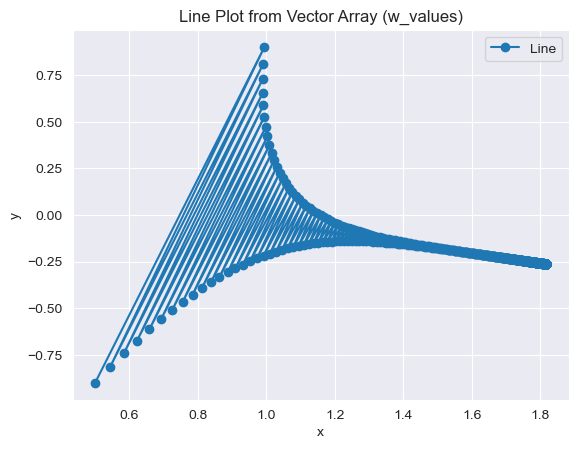

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

trainingData = [
    [1, 1],
    [2, 3],
    [4, 3],
]

def phi(x):
    return np.array([1, x])

def trainLoss(w):
    return 1 / len(trainingData) * sum((w.dot(phi(x)) - y) ** 2 for x, y in trainingData)

def gradiantTrainLoss(w):
    return 1 / len(trainingData) * sum(2 * (w.dot(phi(x)) - y) * phi(x) for x, y in trainingData)

def gradiantDescent(F, gradiantF, step):
    w = np.array([1, 1])
    w_values = []
    iteration = 0  # Manual iteration counter

    while True:
        loss = F(w)
        gradiant = gradiantF(w)
        w = w - step * gradiant
        if np.linalg.norm(gradiant) < 1e-9:  # Convergence condition
            break
        if iteration > 5000:  # Iteration limit to prevent infinite loops
            print("Iteration limit reached. Stopping.")
            break
        w_values.append(w.copy())
        print(f"Loss at iteration {iteration}: w={w}, loss={loss}, gradiant={gradiant}")
        iteration += 1  # Increment iteration counter

    # Plot the line using coordinates from w_values
    w_df = pd.DataFrame(w_values, columns=["x", "y"])
    plt.plot(w_df["x"], w_df["y"], marker="o", label="Line")
    plt.title("Line Plot from Vector Array (w_values)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

gradiantDescent(trainLoss, gradiantTrainLoss, 0.01)